In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
def data(ticker, start='2020-01-01', end='2024-12-17'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Close']]
    return data


def EMA(data, short_window=50, long_window=200):

    data['EMA50'] = data['Close'].ewm(span=short_window).mean()
    data['EMA200'] = data['Close'].ewm(span=long_window).mean()
    data['Signal_EMA'] = np.where(data['EMA50'] > data['EMA200'], 1, 0)
    data['Position_EMA'] = data['Signal_EMA'].diff()
    return data

def SMA(data, short_window=50, long_window=200):
    data['SMA50'] = data['Close'].rolling(window=short_window).mean()
    data['SMA200'] = data['Close'].rolling(window=long_window).mean()
    data['Signal_SMA'] = np.where(data['SMA50'] > data['SMA200'], 1, 0)
    data['Position_SMA'] = data['Signal_SMA'].diff()
    return data


def backtest_strat(data, initial_capital = 10000):
    capital_SMA = initial_capital
    returns_SMA = []
    buy_price_SMA = 0
    position_SMA = 0

    for i in range(len(data)):
        if data['Position_SMA'].iloc[i] == 1:
            position_SMA = capital_SMA/data['Close'].iloc[i]
            buy_price_SMA = data['Close'].iloc[i]
            capital_SMA = 0
        elif data['Position'].iloc[i] == -1 and position > 0:  # Sell Signal
            capital_SMA = position_SMA * data['Close'].iloc[i]
            returns_SMA.append((data['Close'].iloc[i] - buy_price_SMA) / buy_price_SMA)
            position = 0

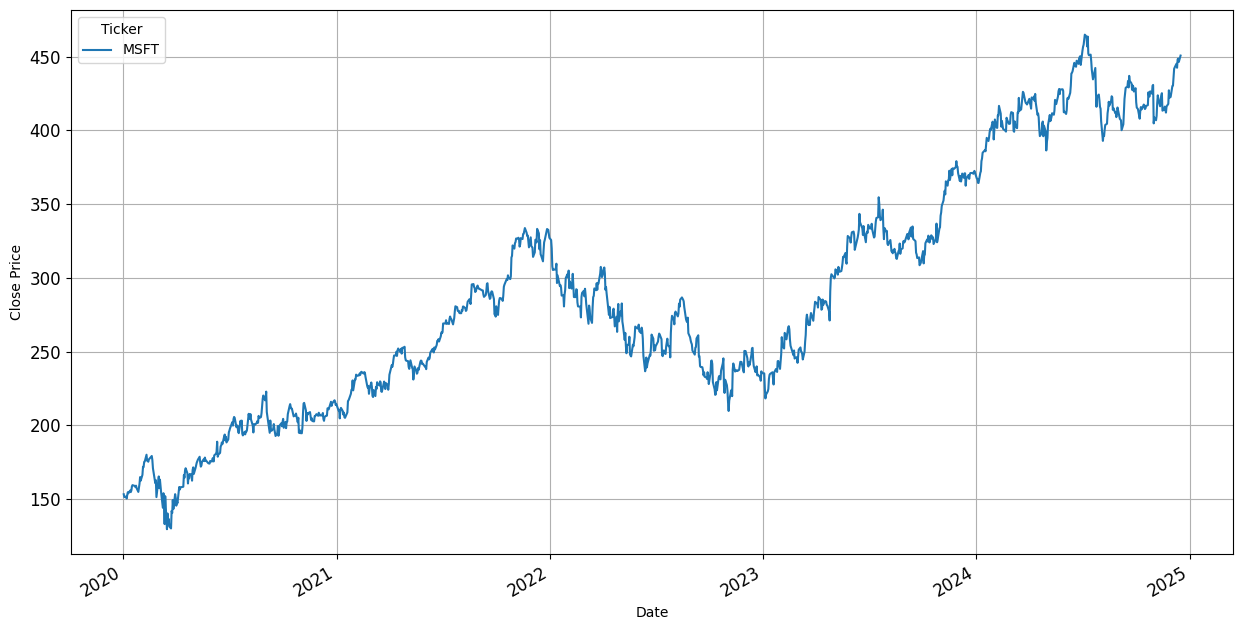

In [3]:
data['Close'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Close Price')
plt.show()

Simple Moving Averages

In [4]:
short_window = 50
long_window = 200
data['SMA50'] = data['Close'].rolling(window=short_window).mean()
data['SMA200'] = data['Close'].rolling(window=long_window).mean()

data

Price,Close,SMA50,SMA200
Ticker,MSFT,,
Date,,,
2020-01-02,153.323257,NaN,NaN
2020-01-03,151.414139,NaN,NaN
2020-01-06,151.805527,NaN,NaN
2020-01-07,150.421356,NaN,NaN
2020-01-08,152.817337,NaN,NaN
...,...,...,...
2024-12-10,442.442841,420.700978,420.897255
2024-12-11,448.091522,421.282620,421.115749


In [5]:
data['Signal_SMA'] = 0  
data['Signal_SMA'] = np.where(data['SMA50'] > data['SMA200'], 1, 0) 

data['Position_SMA'] = data['Signal_SMA'].diff()

data['Position_SMA'].dropna()
data

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA
Ticker,MSFT,,,,
Date,,,,,
2020-01-02,153.323257,NaN,NaN,0,NaN
2020-01-03,151.414139,NaN,NaN,0,0.0
2020-01-06,151.805527,NaN,NaN,0,0.0
2020-01-07,150.421356,NaN,NaN,0,0.0
2020-01-08,152.817337,NaN,NaN,0,0.0
...,...,...,...,...,...
2024-12-10,442.442841,420.700978,420.897255,0,0.0
2024-12-11,448.091522,421.282620,421.115749,1,1.0


In [6]:
data['Position_SMA'].unique()

array([nan,  0.,  1., -1.])

<function matplotlib.pyplot.show(close=None, block=None)>

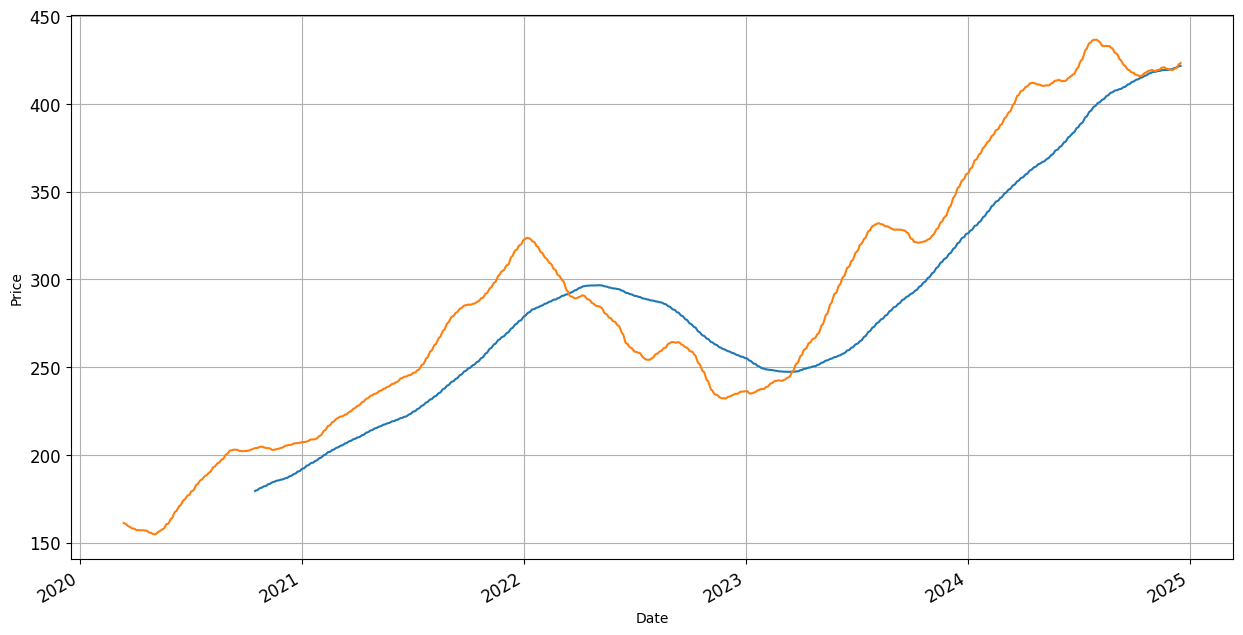

In [7]:
data['SMA200'].plot(figsize=(15,8), fontsize=12)
data['SMA50'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Price')
plt.show

In [8]:
data['Signal_SMA'] = 0  
data['Signal_SMA'] = np.where(data['SMA50'] > data['SMA200'], 1, 0) 

data['Position_SMA'] = data['Signal_SMA'].diff()

data

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA
Ticker,MSFT,,,,
Date,,,,,
2020-01-02,153.323257,NaN,NaN,0,NaN
2020-01-03,151.414139,NaN,NaN,0,0.0
2020-01-06,151.805527,NaN,NaN,0,0.0
2020-01-07,150.421356,NaN,NaN,0,0.0
2020-01-08,152.817337,NaN,NaN,0,0.0
...,...,...,...,...,...
2024-12-10,442.442841,420.700978,420.897255,0,0.0
2024-12-11,448.091522,421.282620,421.115749,1,1.0


In [9]:
data.to_csv('Data.csv')

In [10]:
data.index = pd.to_datetime(data.index)
data_sma = data[data.index > '2020-03-20']
data_sma

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA
Ticker,MSFT,,,,
Date,,,,,
2020-03-23,130.157150,159.016808,NaN,0,0.0
2020-03-24,141.987869,158.776354,NaN,0,0.0
2020-03-25,140.628693,158.471679,NaN,0,0.0
2020-03-26,149.425171,158.364889,NaN,0,0.0
2020-03-27,143.289658,158.115342,NaN,0,0.0
...,...,...,...,...,...
2024-12-10,442.442841,420.700978,420.897255,0,0.0
2024-12-11,448.091522,421.282620,421.115749,1,1.0


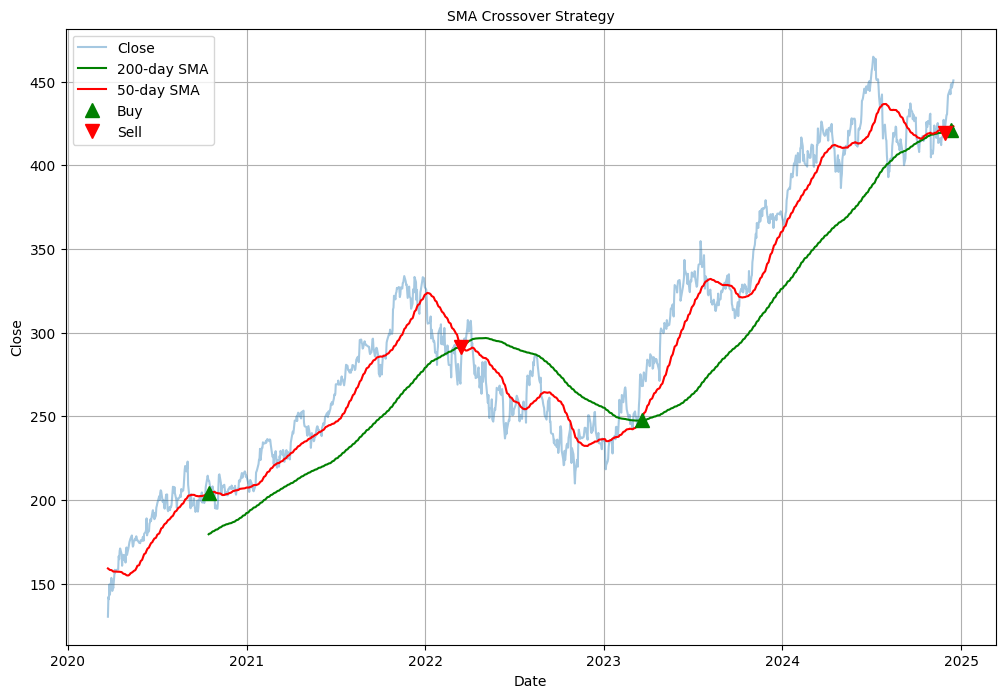

In [11]:
import matplotlib.pyplot as plt
import mplcursors

plt.figure(figsize=(12, 8))

# Plot the closing prices
plt.plot(data_sma['Close'], alpha=0.4, label='Close')

# Plot the 200-day SMA
plt.plot(data_sma['SMA200'], color='g', label='200-day SMA')

# Plot the 50-day SMA
plt.plot(data_sma['SMA50'], color='r', label='50-day SMA')

# Plot 'buy' signals
plt.plot(data_sma[data_sma['Position_SMA'] == 1].index, 
         data_sma['SMA50'][data_sma['Position_SMA'] == 1], 
         '^', markersize=10, color='g', alpha=1, label='Buy')

plt.plot(data_sma[data_sma['Position_SMA'] == -1].index, 
         data_sma['SMA50'][data_sma['Position_SMA'] == -1], 
         'v', markersize=10, color='r', alpha=1, label='Sell')

# Set labels and title
plt.ylabel('Close', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.title('SMA Crossover Strategy', fontsize=10)
plt.legend()
plt.grid()

# Show the figure
plt.show()

In [12]:
short_window = 50
long_window = 200

data['EMA50'] = data['Close'].ewm(span=short_window).mean()

data['EMA200'] = data['Close'].ewm(span=long_window).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

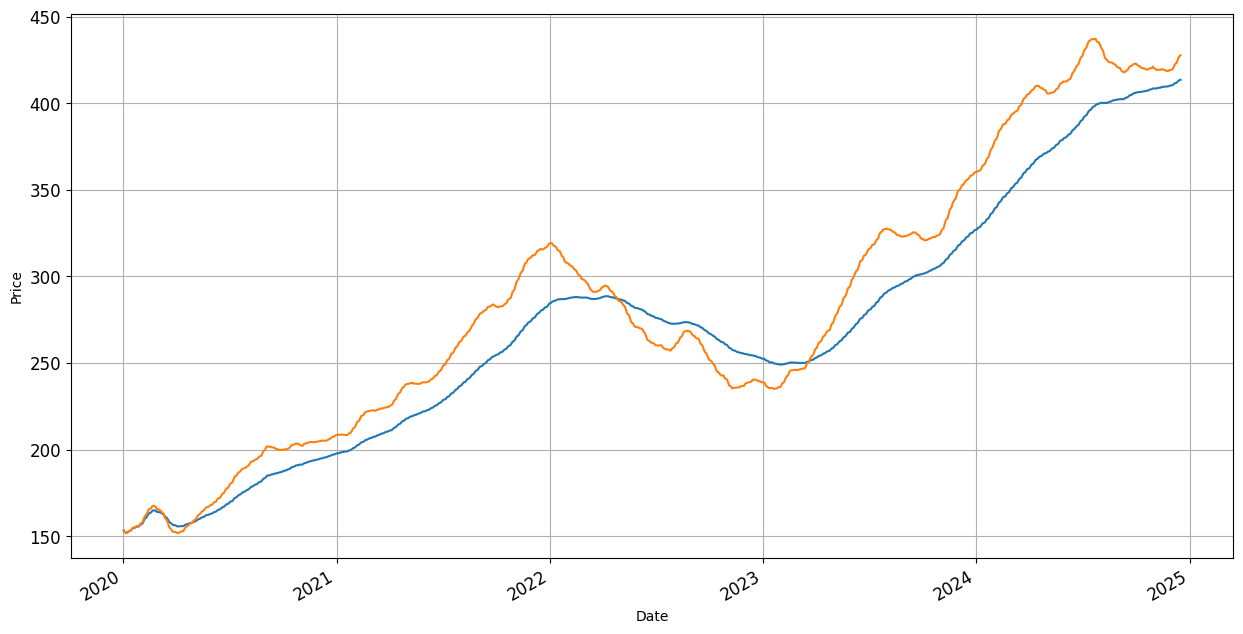

In [13]:
data['EMA200'].plot(figsize=(15,8), fontsize=12)
data['EMA50'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Price')
plt.show

Buy and Sell Signals

In [14]:
data['Signal_EMA'] = 0  
data['Signal_EMA'] = np.where(data['EMA50'] > data['EMA200'], 1, 0) 

data['Position_EMA'] = data['Signal_EMA'].diff()

data

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA,EMA50,EMA200,Signal_EMA,Position_EMA
Ticker,MSFT,,,,,,,,
Date,,,,,,,,,
2020-01-02,153.323257,NaN,NaN,0,NaN,153.323257,153.323257,0,NaN
2020-01-03,151.414139,NaN,NaN,0,0.0,152.349607,152.363925,0,0.0
2020-01-06,151.805527,NaN,NaN,0,0.0,152.160945,152.175928,0,0.0
2020-01-07,150.421356,NaN,NaN,0,0.0,151.699613,151.730684,0,0.0
2020-01-08,152.817337,NaN,NaN,0,0.0,151.941392,151.952383,0,0.0
...,...,...,...,...,...,...,...,...,...
2024-12-10,442.442841,420.700978,420.897255,0,0.0,423.937207,412.052285,1,0.0
2024-12-11,448.091522,421.282620,421.115749,1,1.0,424.884435,412.410885,1,0.0


Plotting the graph

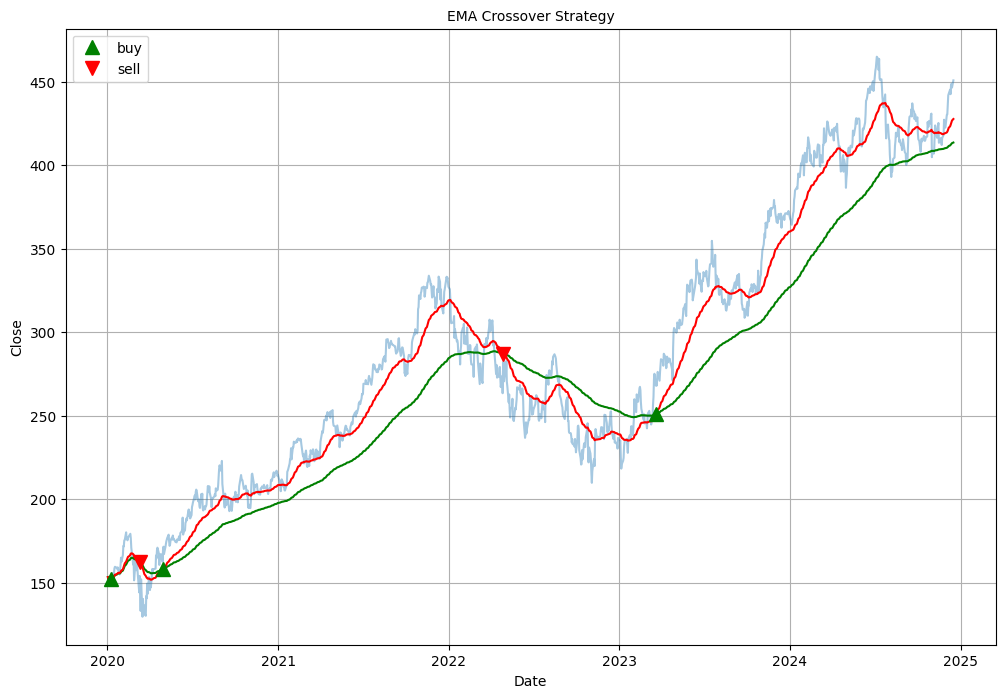

In [15]:
plt.figure(figsize=(12,8))

plt.plot(data['Close'], alpha=0.4)
plt.plot(data['EMA200'],color='g')
plt.plot(data['EMA50'], color='r')



plt.plot(data[data['Position_EMA'] == 1].index, 
         data['EMA50'][data['Position_EMA'] == 1], 
         '^', markersize = 10, color = 'g', alpha = 1, label = 'buy')


plt.plot(data[data['Position_EMA'] == -1].index, 
         data['EMA50'][data['Position_EMA'] == -1], 
         'v', markersize = 10, color = 'r', alpha = 1, label = 'sell')
plt.ylabel('Close', fontsize = 10 )
plt.xlabel('Date', fontsize = 10 )
plt.title('EMA Crossover Strategy', fontsize = 10)
plt.legend()
plt.grid()
plt.show()

Total Return SMA: 115.38%
Total Return EMA: 146.51%


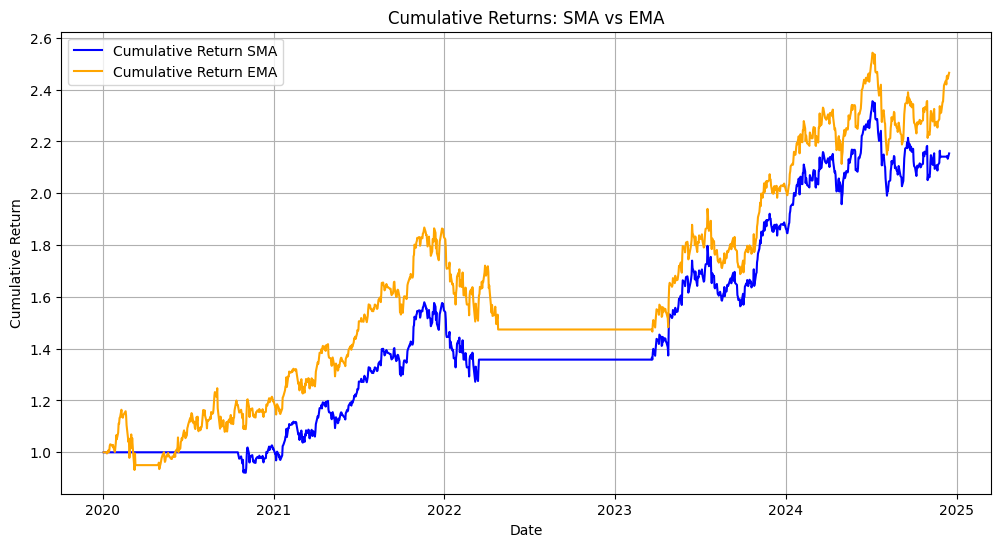

In [16]:
data['Daily_Return'] = data['Close'].pct_change()

data['Strategy_Return_SMA'] = data['Daily_Return'] * data['Signal_SMA'].shift(1)
data['Strategy_Return_EMA'] = data['Daily_Return'] * data['Signal_EMA'].shift(1)

data['Cumulative_Return_SMA'] = (1 + data['Strategy_Return_SMA']).cumprod()
data['Cumulative_Return_EMA'] = (1 + data['Strategy_Return_EMA']).cumprod()

total_return_sma = data['Cumulative_Return_SMA'].iloc[-1] - 1
total_return_ema = data['Cumulative_Return_EMA'].iloc[-1] - 1

print(f'Total Return SMA: {total_return_sma:.2%}')
print(f'Total Return EMA: {total_return_ema:.2%}')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Return_SMA'], label='Cumulative Return SMA', color='blue')
plt.plot(data['Cumulative_Return_EMA'], label='Cumulative Return EMA', color='orange')
plt.title('Cumulative Returns: SMA vs EMA')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

In [17]:
data.to_csv('Data.csv')

In [18]:

def backtest_strategy(data, signal_column):

    backtest = data.copy()
    backtest['Trade_SMA'] = backtest['Signal_SMA'].diff()
    backtest['Trade_EMA'] = backtest['Signal_EMA'].diff()

    trades_SMA = backtest[backtest['Trade_SMA'] != 0].copy()
    trades_EMA = backtest[backtest['Trade_EMA'] != 0].copy()
    
    trades_EMA['TradeType_EMA'] = trades_EMA['Trade'].map({1: 'Buy', -1: 'Sell'})
    trades_EMA['Price_EMA'] = backtest['Close']
    trades_SMA['TradeType_SMA'] = trades_SMA['Trade'].map({1: 'Buy', -1: 'Sell'})
    trades_SMA['Price_SMA'] = backtest['Close']

    
    trades_EMA['TradeReturn_EMA'] = 0.0
    trades_SMA['TradeReturn_SMA'] = 0.0

    buy_trades_SMA = trades_SMA[trades_SMA['TradeType_SMA'] == 'Buy'].index
    buy_trades_EMA = trades_EMA[trades_EMA['TradeType_EMA'] == 'Buy'].index

    for i, buy_date in enumerate(buy_trades):
        if i < len(buy_trades) - 1:
            sell_date = buy_trades[i + 1]
            trade_return = (backtest.loc[sell_date, 'Close'] / backtest.loc[buy_date, 'Close']) - 1
            trades.loc[buy_date, 'TradeReturn'] = trade_return
    
    return backtest, trades